# **Step 1 : Load Tools**

In [47]:
# from google.colab import drive
# drive.mount('/content/Bank_note_prediction')

In [48]:
# Importing core libraries for data handling and visualization
import numpy as np               # NumPy: used for numerical computations, arrays, linear algebra, math functions
import pandas as pd              # Pandas: used for data manipulation and analysis (DataFrames, CSV loading, etc.)
import matplotlib.pyplot as plt  # Matplotlib: plotting library for creating visualizations like line, bar, scatter plots
import seaborn as sns            # Seaborn: advanced visualization library built on Matplotlib, used for heatmaps, pairplots, etc.

# Importing essential Scikit-learn modules for ML workflow
from sklearn.model_selection import train_test_split  # Splits dataset into training and testing subsets
from sklearn.preprocessing import StandardScaler      # Standardizes features by removing mean and scaling to unit variance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  
# accuracy_score → Calculates how many predictions are correct
# confusion_matrix → Shows true positives, false positives, true negatives, false negatives
# classification_report → Provides precision, recall, F1-score, and support for each class

# Importing TensorFlow Keras modules for Deep Learning (ANN)
from tensorflow.keras.models import Sequential   # Sequential: a linear stack of layers for building ANN models
from tensorflow.keras.layers import Dense,Dropout  
# Dense → Fully connected neural network layer (every neuron connected to the next layer)
# Dropout → Regularization technique that randomly turns off some neurons during training to avoid overfitting

from tensorflow.keras.utils import to_categorical  
# Converts labels (e.g., 0,1) into one-hot encoded vectors, useful for multi-class classification

from tensorflow.keras.callbacks import EarlyStopping  
# Stops training early if the model performance stops improving (prevents overfitting and saves training time)


# **Step 2 : Load Dataset**

# **About Dataset**
# **Context**
Banknotes are one of the most important assets of a country. Some miscreants introduce fake notes which bear a resemblance to original notes to create discrepancies in the money in the financial market. It is difficult for humans to tell true and fake banknotes apart especially because they have a lot of similar features.

# **Motivation**
Despite a decrease in the use of currency due to the recent growth in the use of electronic transactions, cash transactions remain very important in the global market. Banknotes are used to carry out financial activities. To continue with smooth cash transactions, the entry of forged banknotes in circulation should be preserved. There has been a drastic increase in the rate of fake notes in the market. Fake money is an imitation of genuine notes and is created illegally for various motives. These fake notes are created in all denominations which brings the financial market of the country to a low level. The various advancements in the field of scanners and copy machines have led the miscreants to create copies of banknotes. It is difficult for human-eye to recognize a fake note because they are created with great accuracy to look alike a genuine note. Security aspects of banknotes have to be considered and security features are to be introduced to mitigate fake currency. Hence, there is a dire need for banks and ATMs to implement a system that classifies a note as genuine or fake.

# **Objective**
Being a Data Science Enthusiast, you committed yourself to use the power of Data Science and coming up with an efficient model that accurately predicts if a note is genuine or not.

# **About the Data**
Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object grey-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool was used to extract features from images.

# **Data Description**

VWTI: Variance of Wavelet Transformed Image

SWTI: Skewness of Wavelet Transformed Image

CWTI: Curtosis of Wavelet Transformed Image

EI: Entropy of Image

Class: Class (1: genuine, 0: forged)

In [49]:
# Load Dataset
data = pd.read_csv("./data/train.csv")  
# 📌 pd.read_csv → Reads a CSV file and loads it into a Pandas DataFrame.
# "./data/train.csv" → Path to the dataset (inside a 'data' folder, file named 'train.csv').
# The resulting 'data' variable will now hold the entire dataset in a tabular (row-column) structure.

data  
# 📌 Displays the contents of the DataFrame (usually the first 20 rows by default in notebooks like Jupyter/Colab).
# Useful for quickly checking if the dataset was loaded correctly.


,VWTI,SWTI,CWTI,EI,Class
0,2.263400,-4.4862,3.65580,-0.612510,0
1,3.271800,1.7837,2.11610,0.613340,0
2,-3.941100,-12.8792,13.05970,-3.312500,1
3,0.519500,-3.2633,3.08950,-0.984900,0
4,2.569800,-4.4076,5.98560,0.078002,0
...,...,...,...,...,...
1091,1.640600,3.5488,1.39640,-0.364240,0
1092,-0.048008,-1.6037,8.47560,0.755580,0
1093,2.942100,7.4101,-0.97709,-0.884060,0
1094,1.964700,6.9383,0.57722,0.663770,0


# **Step 3 : Data Preprocessing**

In [50]:
# Separate features and target
X = data[['VWTI', 'SWTI', 'CWTI', 'EI']]  
# 📌 'X' holds the independent variables (features) used to predict the target.
# Here, we select the columns 'VWTI', 'SWTI', 'CWTI', and 'EI' from the dataset as inputs.

y = data['Class']  
# 📌 'y' is the dependent variable (target), which we want to predict (e.g., 0 = fake note, 1 = real note).


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
# 📌 Splits the dataset into training and testing sets.
# test_size=0.2 → 20% of the data is reserved for testing, 80% for training.
# random_state=42 → ensures reproducibility (same split every run).


# Further split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  
# 📌 Further splits the training set into training (64%) and validation (16%).
# Validation set helps tune hyperparameters and monitor model performance during training.


# Feature scaling
scaler = StandardScaler()  
# 📌 Creates a StandardScaler object to normalize features.
# StandardScaler transforms features so they have mean = 0 and standard deviation = 1.

X_train = scaler.fit_transform(X_train)  
# 📌 Fits the scaler on training data (learns mean & std) and applies scaling.
# Always fit only on training data to prevent data leakage.

X_val = scaler.transform(X_val)  
# 📌 Uses the scaler fitted on training data to scale validation features.

X_test = scaler.transform(X_test)  
# 📌 Uses the same scaler to scale test features (ensures consistency across datasets).


# Ensure target is in binary format (0 or 1 for binary classification)
# No need for one-hot encoding in binary classification
y_train = y_train.values  
y_val = y_val.values  
y_test = y_test.values  
# 📌 Converts the target Series into NumPy arrays for compatibility with ML/DL models.
# Since it's binary classification (0 or 1), one-hot encoding isn’t required.


# Check shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")  
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")  
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")  
# 📌 Prints the shape (rows, columns) of each dataset to confirm splits are correct.
# Helps verify that features and targets align properly in each set.


X_train shape: (700, 4), y_train shape: (700,)
X_val shape: (176, 4), y_val shape: (176,)
X_test shape: (220, 4), y_test shape: (220,)


# **Step 4 : Build the ANN Model**

In [51]:
X_train.shape[1]

4

In [52]:
# Define the model
model = Sequential([  
    # 📌 Sequential means layers are stacked one after another in order.
    
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  
    # 📌 First hidden layer (Dense = fully connected layer).
    # 64 neurons, ReLU activation function.
    # input_shape=(X_train.shape[1],) → number of input features (columns).
    # This is the entry point for our ANN.
    
    Dropout(0.3),  
    # 📌 Randomly drops 30% of neurons during training.
    # Prevents overfitting by ensuring the network doesn’t rely too much on specific neurons.
    
    Dense(32, activation='relu'),  
    # 📌 Second hidden layer with 32 neurons and ReLU activation.
    # Reduces dimensionality and extracts deeper patterns.
    
    Dropout(0.3),  
    # 📌 Another Dropout layer to improve generalization.
    
    Dense(16, activation='relu'),  
    # 📌 Third hidden layer with 16 neurons and ReLU activation.
    # Further condenses feature representations.
    
    Dense(1, activation='sigmoid')  
    # 📌 Output layer with 1 neuron.
    # Sigmoid activation squashes values between 0 and 1 → ideal for binary classification (fake vs real).
])


# Compile the model
model.compile(
    optimizer='adam',  
    # 📌 Adam optimizer → efficient gradient descent algorithm for fast convergence.
    
    loss='binary_crossentropy',  
    # 📌 Binary crossentropy loss function → standard for binary classification problems.
    
    metrics=['accuracy']  
    # 📌 We’ll track accuracy during training/validation/testing.
)


# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',          # 📌 Watches validation loss.
    patience=5,                  # 📌 If no improvement for 5 epochs → stop training.
    restore_best_weights=True    # 📌 Roll back to the epoch with the best validation loss.
)


# Check model summary
model.summary()  
# 📌 Prints the architecture of the ANN:
# - Layer types (Dense, Dropout)
# - Output shapes
# - Number of trainable parameters
# Useful to confirm the network is built as expected.


c:\Users\kevin\Documents\my projects\Building Fake Bank Notes Detection System Using Deep learning ANN\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

# **Step 5 : Train The Model**

In [53]:
# Train the model
history = model.fit(  
    X_train, y_train,  
    # 📌 Training data (features and labels).
    # The model will learn patterns from these samples.
    
    validation_data=(X_val, y_val),  
    # 📌 Validation set → evaluates model performance after each epoch.
    # Used to monitor overfitting (model doing well on train but poorly on unseen data).
    
    epochs=15,  
    # 📌 Maximum number of times the model sees the entire dataset.
    # Here, 15 passes through the training set.
    
    batch_size=32,  
    # 📌 Number of samples processed before updating weights.
    # Smaller batch size → more updates, but slower training.
    # 32 is a standard balance for speed and stability.
    
    callbacks=[early_stopping]  
    # 📌 Uses EarlyStopping (defined earlier).
    # Training will stop before 15 epochs if validation loss doesn’t improve for 5 consecutive epochs.
)


Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.5971 - loss: 0.6636 - val_accuracy: 0.8125 - val_loss: 0.6085
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7729 - loss: 0.5823 - val_accuracy: 0.8523 - val_loss: 0.5031
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8614 - loss: 0.4801 - val_accuracy: 0.8750 - val_loss: 0.3829
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9171 - loss: 0.3636 - val_accuracy: 0.9261 - val_loss: 0.2730
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9414 - loss: 0.2599 - val_accuracy: 0.9602 - val_loss: 0.1809
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9586 - loss: 0.1719 - val_accuracy: 0.9602 - val_loss: 0.1249
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9743 - loss: 0.1187 - val_accuracy: 0.9830 - val_loss: 0.0926
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9714 - loss: 0.1051 - val_accuracy: 0.9773 - v

# **Step 6 : Evaluate the Model**

In [54]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)  
# 📌 model.evaluate → Runs the model on the test dataset.
# - X_test: test features (scaled inputs).
# - y_test: true labels (ground truth).
# Returns two values:
#   test_loss → the loss value on test data (how far predictions are from true labels).
#   test_acc  → accuracy on test data (fraction of correct predictions).


print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")  
# 📌 Prints test performance in a human-readable format.
# :.4f → formats the numbers to 4 decimal places.
# Example output: Test Loss: 0.2456, Test Accuracy: 0.9523


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9864 - loss: 0.0227
Test Loss: 0.0227, Test Accuracy: 0.9864


# **7. Generate Evaluation Metrics**

In [55]:
# Generate predictions for the test dataset using the trained model.
# The model.predict(X_test) outputs probabilities between 0 and 1 for each sample.
# ( > 0.5 ) converts probabilities to binary class labels: values > 0.5 become True (1), otherwise False (0).
# .astype(int) converts the boolean values (True/False) into integers (1/0) for classification.
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Print a header to indicate that the following output is the classification report.
print("Classification Report:")

# Generate and print a detailed classification report comparing the true labels (y_test)
# with the predicted labels (y_pred). 
# This report includes metrics like precision, recall, f1-score, and support for each class.
print(classification_report(y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       135
           1       0.97      1.00      0.98        85

    accuracy                           0.99       220
   macro avg       0.98      0.99      0.99       220
weighted avg       0.99      0.99      0.99       220



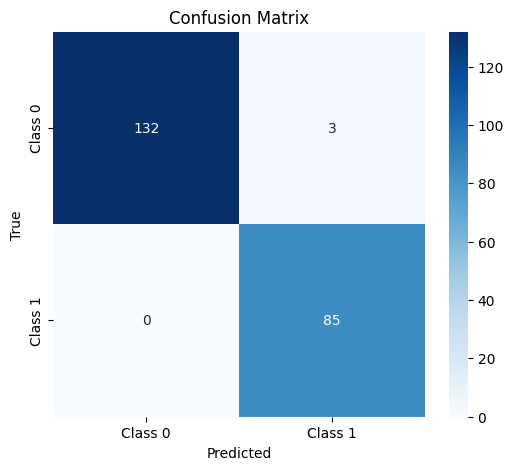

In [56]:
# Import the seaborn library for creating advanced visualizations
import seaborn as sns

# Compute the confusion matrix comparing true labels (y_test) to predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Create a new figure for the plot with a size of 6 inches by 5 inches
plt.figure(figsize=(6, 5))

# Plot the confusion matrix using seaborn's heatmap function
# - cm: the confusion matrix data
# - annot=True: write the data values on each cell
# - fmt='d': format numbers as integers
# - cmap='Blues': use a blue color palette
# - xticklabels and yticklabels: label the axes with class names
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Set the label for the x-axis
plt.xlabel('Predicted')

# Set the label for the y-axis
plt.ylabel('True')

# Set the title of the plot
plt.title('Confusion Matrix')

# Display the plot
plt.show()


# **Step 8: Prediction System**

In [57]:
# Import numpy library for numerical operations (arrays, matrices, etc.)
import numpy as np

# Define a function called make_prediction that takes input_data as argument
def make_prediction(input_data):
    
    # Preprocess the input data before feeding it to the model
    # Scale the input using a pre-fitted scaler (assumes `scaler` is already trained)
    # transform() scales the input data based on the parameters learned from training data
    input_data_scaled = scaler.transform(input_data)  # Do not use fit_transform to avoid refitting
    
    # Use the trained model to predict probabilities for the scaled input data
    predictions = model.predict(input_data_scaled)
    
    # Convert the predicted probabilities to binary class labels (0 or 1)
    # Any probability > 0.5 is considered class 1, otherwise class 0
    predicted_classes = (predictions > 0.5).astype(int)
    
    # Return a human-readable string based on the predicted class
    # If the predicted class is 1, return "Real"; otherwise, return "Fake"
    if predicted_classes[0] == 1:
        return "Real"
    else:
        return "Fake"


In [58]:
# Create example input data as a NumPy array
# Each row represents one sample and each column represents a feature
# Replace these numbers with actual data from a form or dataset
input_data = np.array([[1.5, 2.3, 3.4, 0.7]])  # Example features

# Call the make_prediction function defined earlier
# This function will preprocess the data, make a prediction, and return "Real" or "Fake"
result = make_prediction(input_data)

# Print the prediction result to the console
# Output will be either "Real" or "Fake" based on the model's prediction
print(result)


c:\Users\kevin\Documents\my projects\Building Fake Bank Notes Detection System Using Deep learning ANN\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Fake


In [59]:
# Create example input data as a NumPy array
# Each row is a single sample, and each column represents a feature
# Replace the numbers with actual input values from your form or dataset
input_data = np.array([[-3.9411, -12.8792,  13.0597,  -3.3125]])  # Example features

# Call the make_prediction function to get the prediction for this input
# The function will scale the input, use the trained model to predict, 
# and return "Real" or "Fake"
result = make_prediction(input_data)

# Print the prediction result
# Output will be "Real" if the model predicts class 1, or "Fake" if it predicts class 0
print(result)


c:\Users\kevin\Documents\my projects\Building Fake Bank Notes Detection System Using Deep learning ANN\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Real



# **Step 9: Save Model**

In [60]:
# Save the trained model to a file in HDF5 format
# 'models/model.h5' is the file path where the model will be stored
# This allows you to reload the model later without retraining
model.save('models/model.h5')

# Save the pre-fitted scaler using Python's pickle module
# Open a file in write-binary mode ('wb') to store the scaler object
with open('models/scaler.pkl', 'wb') as scaler_file:
    # Dump the scaler object into the file
    # This preserves the scaling parameters (mean, variance) for future use
    pickle.dump(scaler, scaler_file)
